In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

In [2]:
# Importing the dataset
forest_data = pd.read_csv("forestfires.csv")
print(forest_data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51  6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7    18  33  0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33  1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5     9   8.3  97    4   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99  1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..  ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32  2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71  5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70  6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42    4   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31  4.5   0.0   0.00

[517 rows x 13 columns]


### DATASET ANALYSIS

In [3]:
# Checking if one of the variables contains na
pd.isna(forest_data).any(axis = 0)

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [4]:
# Checking overall shape
forest_data.shape
names = forest_data.columns

(517, 13)

In [5]:
# Sometimes variables may not be called 'na', so I decided to search for variables visually if one stands out as a non numeric one
name = []
index = []
for x in range(0,13,1):
    np.unique(forest_data[names[x]], return_index = True)[0]




array([1, 2, 3, 4, 5, 6, 7, 8, 9])

array([2, 3, 4, 5, 6, 8, 9])

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

array(['18.7', '50.4', '53.4', '63.5', '68.2', '69', '75.1', '79.5',
       '81.5', '81.6', '81.9', '82.1', '83', '83.9', '84', '84.1', '84.2',
       '84.4', '84.6', '84.7', '84.9', '85', '85.1', '85.2', '85.4',
       '85.6', '85.8', '85.9', '86.2', '86.3', '86.6', '86.8', '86.9',
       '87.1', '87.2', '87.5', '87.6', '87.9', '88', '88.1', '88.2',
       '88.3', '88.6', '88.8', '88.9', '89.2', '89.3', '89.4', '89.6',
       '89.7', '90', '90.1', '90.2', '90.3', '90.4', '90.5', '90.6',
       '90.7', '90.8', '90.9', '91', '91.1', '91.2', '91.3', '91.4',
       '91.5', '91.6', '91.7', '91.8', '91.9', '92', '92.1', '92.2',
       '92.3', '92.4', '92.5', '92.6', '92.7', '92.8', '92.9', '93',
       '93.1', '93.2', '93.3', '93.4', '93.5', '93.6', '93.7', '93.9',
       '94', '94.2', '94.3', '94.4', '94.5', '94.6', '94.8', '94.9', '95',
       '95.1', '95.2', '95.5', '95.8', '95.9', '96', '96.1', '96.2',
       'Missing'], dtype=object)

array([  1.1,   2.4,   3. ,   3.2,   3.6,   3.7,   4.4,   4.6,   4.9,
         6.6,   6.8,   7.3,   8. ,   8.2,   8.7,   9. ,   9.1,   9.3,
         9.5,  13.2,  14.6,  15. ,  15.1,  15.6,  17.2,  17.3,  18.2,
        18.5,  18.9,  19.5,  20.6,  21.5,  23.3,  23.9,  24.9,  25.4,
        25.7,  26.2,  26.4,  26.7,  27.2,  27.4,  27.5,  27.8,  27.9,
        28. ,  30.7,  32.8,  33.3,  35.4,  35.8,  37.6,  37.9,  39.7,
        41.5,  41.9,  43.7,  44. ,  46.2,  46.5,  47.9,  48.3,  48.5,
        49.5,  50.1,  51.2,  51.3,  52.2,  53.3,  55.2,  56.4,  56.7,
        60.6,  61.1,  62.3,  68.6,  69.7,  70.8,  71. ,  73.2,  73.4,
        75.3,  75.6,  77. ,  78.5,  80.7,  80.9,  81.8,  82.9,  84.1,
        84.7,  84.8,  85.1,  85.3,  87.7,  88. ,  88.2,  88.8,  88.9,
        89.5,  90. ,  90.4,  91.3,  91.6,  91.8,  92.1,  93.3,  94.1,
        94.3,  96.2,  96.3,  96.7,  96.9,  97.9,  99. ,  99.6,  99.9,
       100.2, 101.3, 102.2, 102.3, 103.2, 103.8, 103.9, 104.2, 105.8,
       108. , 108.3,

array(['100.4', '100.7', '102.2', '103.8', '106.7', '113.8', '15.3',
       '15.5', '15.8', '16.2', '171.4', '18.7', '200', '229', '232.1',
       '233.8', '25.6', '252.6', '26.6', '28.3', '290.8', '296.3',
       '297.7', '298.1', '30.2', '30.6', '309.9', '313.4', '316.7',
       '32.1', '34', '349.7', '350.2', '352', '352.6', '353.5', '354.6',
       '355.2', '36.9', '366.7', '368.3', '376.6', '377.2', '395', '41.1',
       '41.6', '411.8', '423.4', '424.1', '43', '43.5', '43.6', '430.8',
       '431.6', '433.3', '437.7', '440.9', '442.1', '442.9', '450.2',
       '458.8', '46.7', '466.3', '466.6', '474.9', '48.3', '480.8', '488',
       '495.6', '503.6', '513.3', '52.8', '520.5', '529.8', '537.4',
       '542', '55', '55.2', '550.3', '56.9', '560', '561.6', '565.5',
       '567.2', '57.3', '570.5', '573', '575.8', '578.8', '58.3', '581.1',
       '586.7', '587.1', '589.9', '594.2', '596.3', '601.4', '605.3',
       '605.8', '607.1', '608.2', '609.6', '613', '614.5', '614.7',
       

array(['0', '0.4', '0.7', '0.8', '1.1', '1.5', '1.8', '1.9', '10.1',
       '10.2', '10.4', '10.6', '10.7', '10.8', '11', '11.1', '11.3',
       '11.4', '11.6', '11.9', '12', '12.1', '12.2', '12.3', '12.5',
       '12.7', '12.9', '13', '13.2', '13.5', '13.7', '13.8', '13.9', '14',
       '14.1', '14.3', '14.4', '14.6', '14.7', '15.1', '15.9', '16.3',
       '16.5', '16.7', '16.8', '17', '17.7', '17.9', '18', '2', '2.1',
       '2.2', '2.3', '2.6', '2.7', '2.8', '2.9', '20', '20.3', '21.3',
       '22.6', '22.7', '3', '3.2', '3.3', '3.4', '3.5', '3.7', '3.8',
       '3.9', '4', '4.1', '4.7', '4.8', '5', '5.1', '5.2', '5.3', '5.4',
       '5.5', '5.6', '5.7', '5.8', '56.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '6.7', '6.8', '7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6',
       '7.7', '7.8', '7.9', '8', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6',
       '8.7', '8.8', '8.9', '9', '9.2', '9.4', '9.5', '9.6', '9.7', '9.8',
       '9.9', 'Missing'], dtype=object)

array(['10.1', '10.2', '10.3', '10.4', '10.5', '10.6', '10.9', '11',
       '11.2', '11.3', '11.4', '11.5', '11.6', '11.7', '11.8', '12.2',
       '12.3', '12.4', '12.6', '12.7', '12.8', '12.9', '13.1', '13.2',
       '13.3', '13.4', '13.7', '13.8', '13.9', '14', '14.1', '14.2',
       '14.3', '14.4', '14.5', '14.6', '14.7', '14.8', '14.9', '15.1',
       '15.2', '15.4', '15.5', '15.6', '15.7', '15.8', '15.9', '16',
       '16.1', '16.2', '16.3', '16.4', '16.6', '16.7', '16.8', '16.9',
       '17', '17.1', '17.2', '17.3', '17.4', '17.6', '17.7', '17.8',
       '17.9', '18', '18.1', '18.2', '18.3', '18.4', '18.5', '18.6',
       '18.7', '18.8', '18.9', '19', '19.1', '19.2', '19.3', '19.4',
       '19.5', '19.6', '19.7', '19.8', '19.9', '2.2', '20.1', '20.2',
       '20.3', '20.4', '20.5', '20.6', '20.7', '20.8', '20.9', '21',
       '21.1', '21.2', '21.3', '21.4', '21.5', '21.6', '21.7', '21.8',
       '21.9', '22.1', '22.2', '22.3', '22.4', '22.5', '22.6', '22.7',
       '22.8', '22.9'

array([ 15,  17,  18,  19,  20,  21,  22,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  82,
        84,  86,  87,  88,  90,  94,  96,  97,  99, 100])

array(['0.4', '0.9', '1.3', '1.8', '2.2', '2.7', '3.1', '3.6', '4', '4.5',
       '4.9', '5.4', '5.8', '6.3', '6.7', '7.2', '7.6', '8', '8.5', '8.9',
       '9.4', 'Missing'], dtype=object)

array([0. , 0.2, 0.4, 0.8, 1. , 1.4, 6.4])

array([0.00000e+00, 9.00000e-02, 1.70000e-01, 2.10000e-01, 2.40000e-01,
       3.30000e-01, 3.60000e-01, 4.10000e-01, 4.30000e-01, 4.70000e-01,
       5.20000e-01, 5.40000e-01, 5.50000e-01, 6.10000e-01, 6.80000e-01,
       7.10000e-01, 7.20000e-01, 7.50000e-01, 7.60000e-01, 7.70000e-01,
       7.90000e-01, 9.00000e-01, 9.50000e-01, 9.60000e-01, 1.01000e+00,
       1.07000e+00, 1.09000e+00, 1.10000e+00, 1.12000e+00, 1.19000e+00,
       1.23000e+00, 1.26000e+00, 1.29000e+00, 1.36000e+00, 1.38000e+00,
       1.43000e+00, 1.46000e+00, 1.47000e+00, 1.52000e+00, 1.56000e+00,
       1.58000e+00, 1.61000e+00, 1.63000e+00, 1.64000e+00, 1.69000e+00,
       1.72000e+00, 1.75000e+00, 1.76000e+00, 1.90000e+00, 1.94000e+00,
       1.95000e+00, 2.00000e+00, 2.01000e+00, 2.03000e+00, 2.07000e+00,
       2.13000e+00, 2.14000e+00, 2.17000e+00, 2.18000e+00, 2.21000e+00,
       2.29000e+00, 2.35000e+00, 2.44000e+00, 2.47000e+00, 2.51000e+00,
       2.53000e+00, 2.55000e+00, 2.57000e+00, 2.64000e+00, 2.690

Some of the variables show missing values reported as 'Missing', I will then try to count them and if the
 number is low enough, I could try to remove them

In [6]:
# Counting the number of 'Missing' values
counter = 0
for x in range(0,13,1):
    for y in range(0,517,1):
        if forest_data[names[x]][y] == 'Missing':
            counter += 1
print(counter)

7


Since the total number of missing value is 7, I will delete them, cause it does not seem that 
much information is missing. If there were a higher number of missing values, one could try to put instead
a number that may be significative. An example could be taking the mean of the values, take the variance
and thanks to a random function add or substract (also this chosen randomly) a value inside the variance

In [7]:
for x in range(0, 13,1):
    forest_data = forest_data[forest_data[names[x]]!= 'Missing']

In [8]:
# Check if the deletion was complete
counter = 0
for x in range(0,13,1):
    for y in range(0,len([forest_data[names[x]]]),1):
        if forest_data[names[x]][y] == 'Missing':
            counter += 1
print(counter)
forest_data.shape

0


(510, 13)

In [9]:
# Since some of the variables are not numeric, it is needed
# to use 1-of-C to actually use them in the regression
def onehot_feature(pd_data, column_name):
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    pd_data = pd_data.drop(column_name, axis=1)
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

# Convert months and days into a one-hot encoding
forest_data = onehot_feature(forest_data, 'month')
forest_data = onehot_feature(forest_data, 'day')
forest_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9,8.3,97,4,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
forest_data.columns
# Check to see the column names 

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [11]:
# Making sure features are floats otherwhise 
# there could be problems applying future functions 
forest_data = forest_data.astype(np.float32)
forest_data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7.0,5.0,86.199997,26.200001,94.300003,5.1,8.2,51.0,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,4.0,90.599998,35.400002,669.099976,6.7,18.0,33.0,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,4.0,90.599998,43.700001,686.900024,6.7,14.6,33.0,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8.0,6.0,91.699997,33.299999,77.500000,9.0,8.3,97.0,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,6.0,89.300003,51.299999,102.199997,9.6,11.4,99.0,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


This is used to visualize the 'data' columns, that is gonna be my y.
In the paper it is suggested to convert it
to properly analyze it, one of the reasons was to 
lower the skewness of the variable, I then used the skew() function 
to show it

<Figure size 1152x360 with 0 Axes>

Skew: 12.762727737426758


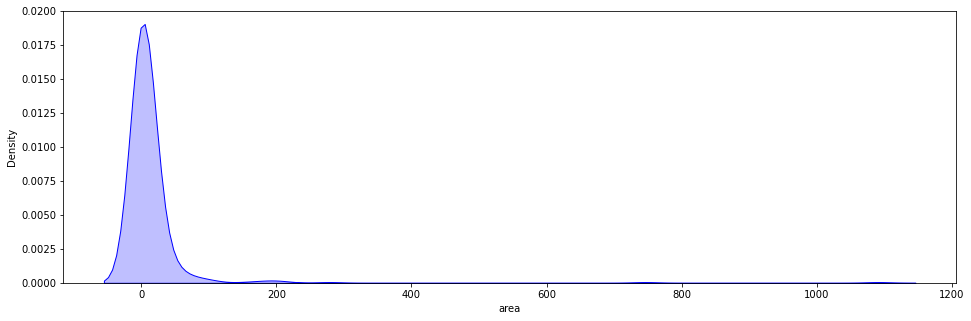

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forest_data['area'].skew()))
graph = sns.kdeplot(forest_data['area'],shade=True,color='b')
plt.show()

In [13]:
X_all_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']

X = forest_data[X_all_features].to_numpy()

y = forest_data['area'].to_numpy()
y = np.log(y+1)
# This transformation of y is used to reduce the skewness of the curve

y_pd = pd.DataFrame(y, columns = ['area'])
# I then converted it into a dataframe to plot the new curve

print("X.shape", X.shape, "X.dtype", X.dtype)
print("y.shape", y.shape, "y.dtype", y.dtype)

X.shape (510, 29) X.dtype float32
y.shape (510,) y.dtype float32


<Figure size 1152x360 with 0 Axes>

Skew: 1.1996451616287231


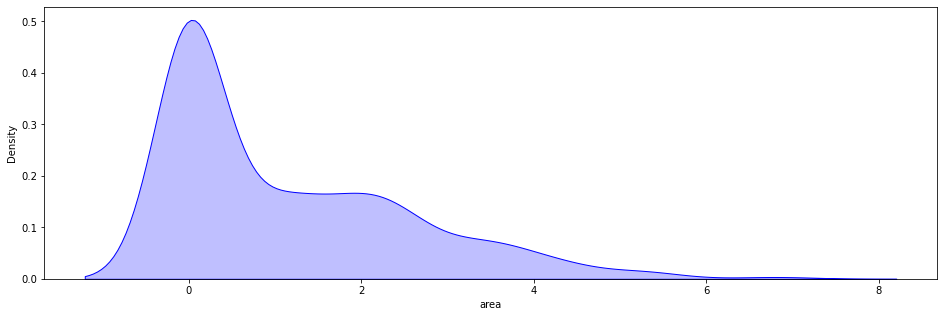

In [14]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(y_pd['area'].skew()))
newgraph = sns.kdeplot(y_pd['area'],shade=True,color='b')
plt.show()

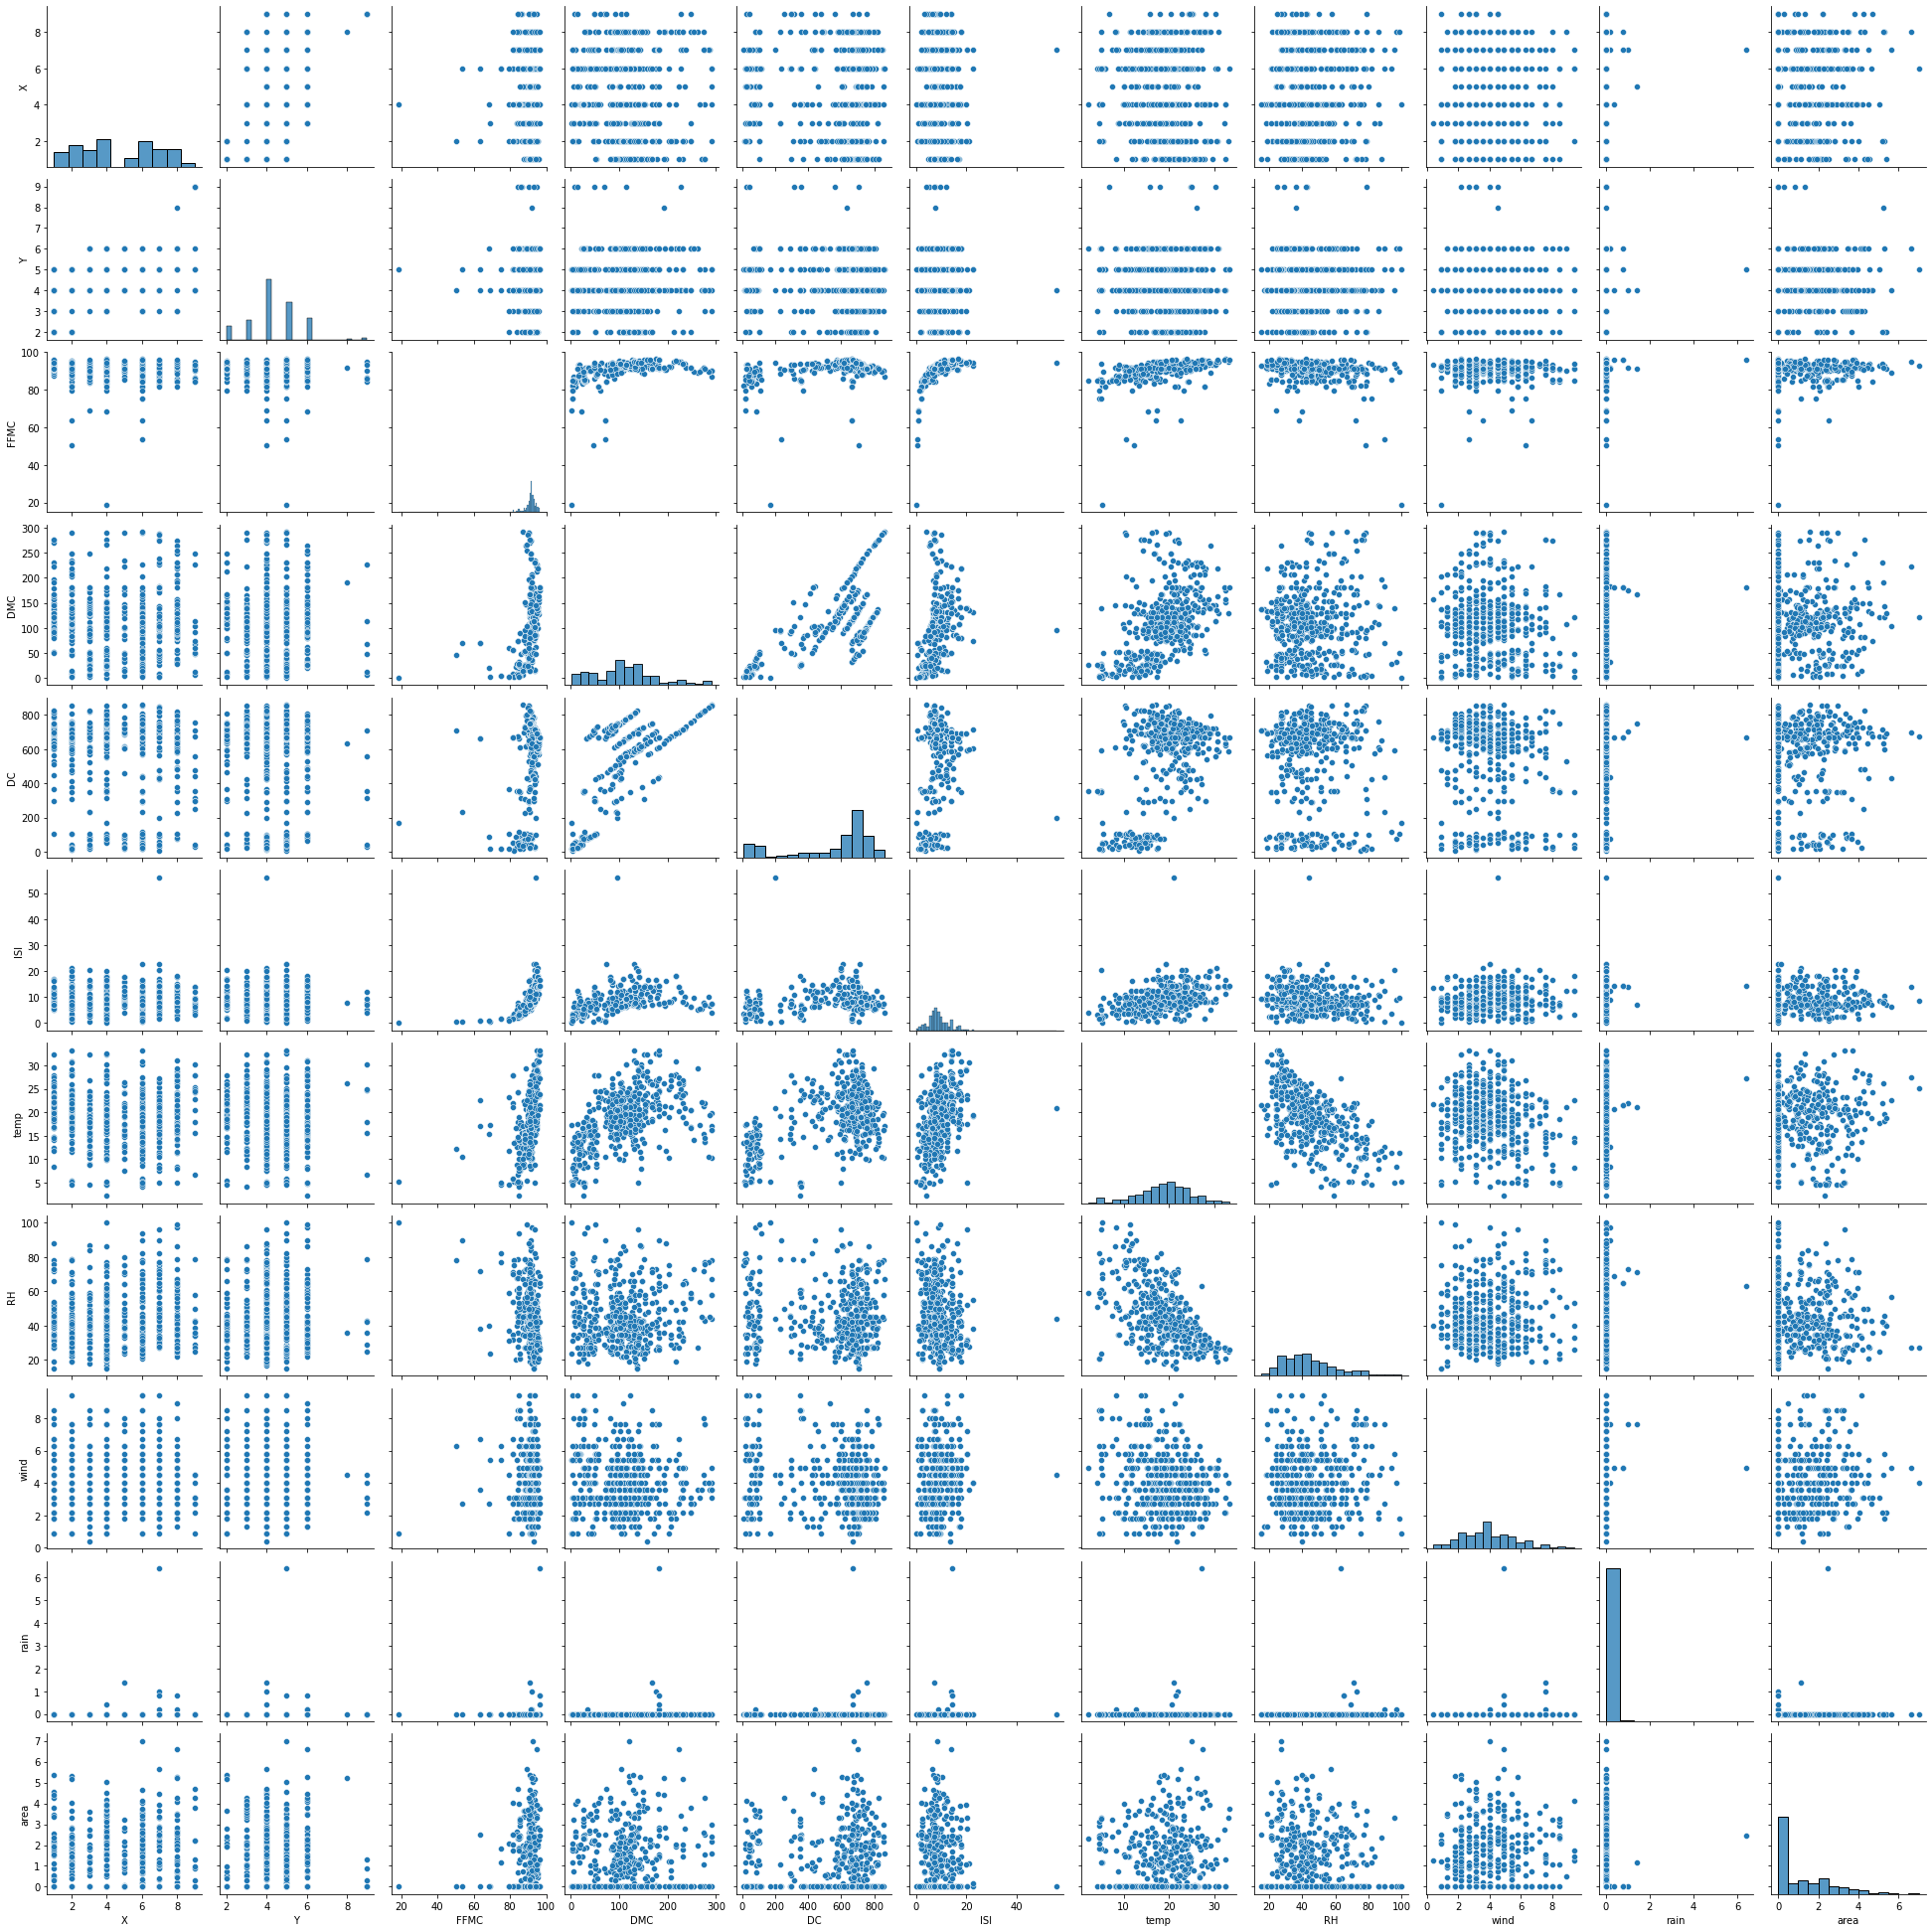

In [15]:
forest_data['area'] = np.log(forest_data['area']+1)
pairplot = pd.DataFrame(forest_data, columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area'])
sns.pairplot(pairplot)
# Pairplot using only the non time dipendent variables

From this pairplot we can already see that 'area' has a lot of points that are equal to 0,
in this case 'area' = 0 correspond to a small fire (described as just smoke)

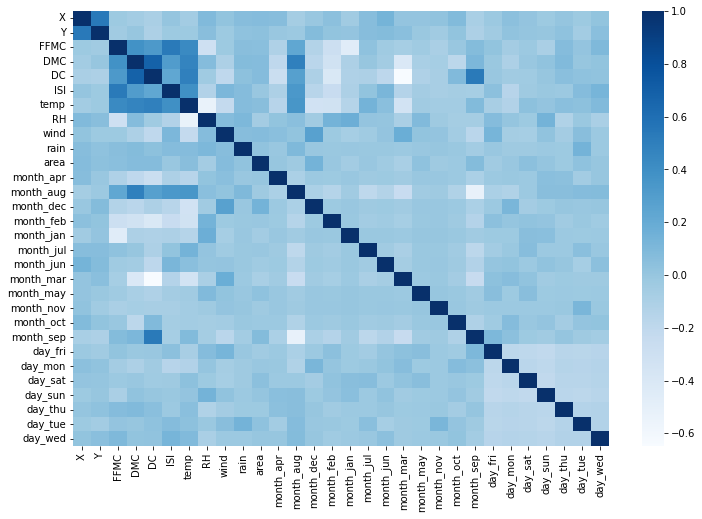

In [16]:
ax = plt.figure(figsize=(12,8))
ax = sns.heatmap(forest_data.corr(), cmap='Blues')

It does seems like the major datas correlated with area are december and september

In [17]:
from sklearn.model_selection import train_test_split
forest_test_size = 0.3
forest_test_seed = 40
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=forest_test_size, random_state=forest_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)


X_train.shape  (357, 29)
X_test.shape  (153, 29)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
model = LinearRegression(fit_intercept=True) 
model = model.fit(X_train, y_train)

# Prediction
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.11998050039903196
Train MSE score  1.6950766
Test R2 score  -0.1452716384386592
Test MSE score  2.3377166


The model does not seem to be predicting the model well, that could be for the high number of 0

In [20]:
# Checking the coefficients for every variable
for idx, col_name in enumerate(X_all_features):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
print("The intercept is {:0.3f}".format(model.intercept_))

The coefficient for X is 0.05358776077628136
The coefficient for Y is 0.02653457224369049
The coefficient for FFMC is 0.01469473633915186
The coefficient for DMC is 0.0024532461538910866
The coefficient for DC is -0.0022235307842493057
The coefficient for ISI is -0.010697917081415653
The coefficient for temp is 0.04218374937772751
The coefficient for RH is 0.007226523943245411
The coefficient for wind is 0.09589280933141708
The coefficient for rain is 0.07416835427284241
The coefficient for month_apr is 0.011298549361526966
The coefficient for month_aug is -0.08772604167461395
The coefficient for month_dec is 1.51931631565094
The coefficient for month_feb is -0.167136549949646
The coefficient for month_jan is -0.8734992146492004
The coefficient for month_jul is -0.67041015625
The coefficient for month_jun is -0.7539480328559875
The coefficient for month_mar is -0.8588767051696777
The coefficient for month_may is 2.1794233322143555
The coefficient for month_nov is -1.3083906173706055
Th

In [21]:
# The sequent code is needed to compute t-test statistics and show the results
from scipy.stats import t, f

def rss(y_true, y_pred):
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    
    return df
 
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [22]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train, y_train, betas, ['Intercept', *X_all_features], alpha=0.001)

/var/folders/4q/wly0vymj1js34lgj8_ngl7t40000gn/T/ipykernel_2594/2013829983.py:35: RuntimeWarning: invalid value encountered in sqrt
  se_b = np.sqrt(se2_b)


,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-1.166952,NaN,NaN,NaN,False
1,X,0.053588,0.038004,1.410051,0.159472,False
2,Y,0.026535,0.073056,0.363211,0.716681,False
3,FFMC,0.014695,0.017092,0.859751,0.390554,False
4,DMC,0.002453,0.002311,1.061722,0.289143,False
5,DC,-0.002224,0.001671,-1.330918,0.184140,False
6,ISI,-0.010698,0.019781,-0.540826,0.588994,False
7,temp,0.042184,0.027189,1.551511,0.121744,False
8,RH,0.007227,0.007655,0.943969,0.345880,False
9,wind,0.095893,0.044445,2.157541,0.031689,False


The p-value does not seem to find any of the variable significative. The p-value chosen is quite low, and it 
could be interesting to choose a higher alpha as a threshold

In [23]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train, y_train, betas, ['Intercept', *X_all_features], alpha=0.05)

/var/folders/4q/wly0vymj1js34lgj8_ngl7t40000gn/T/ipykernel_2594/2013829983.py:35: RuntimeWarning: invalid value encountered in sqrt
  se_b = np.sqrt(se2_b)


,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-1.166952,NaN,NaN,NaN,False
1,X,0.053588,0.038004,1.410051,0.159472,False
2,Y,0.026535,0.073056,0.363211,0.716681,False
3,FFMC,0.014695,0.017092,0.859751,0.390554,False
4,DMC,0.002453,0.002311,1.061722,0.289143,False
5,DC,-0.002224,0.001671,-1.330918,0.184140,False
6,ISI,-0.010698,0.019781,-0.540826,0.588994,False
7,temp,0.042184,0.027189,1.551511,0.121744,False
8,RH,0.007227,0.007655,0.943969,0.345880,False
9,wind,0.095893,0.044445,2.157541,0.031689,True


It does seem that with a higher alpha threshold, the only  variable that possibly could be correlated with a higher area is wind

In [24]:
alpha = 0.05

X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
y_train_pd = pd.DataFrame(y_train)

features = ['wind']
p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha:
    print("Reject H0: There evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")

p-value = 0.03195136025801612
F-stat = 4.640759554647001
Reject H0: There evidence to say that at least one of the S features is useful


This was expected, and the p-value is equal to the single p-value of
the t-statistic of 'wind', as it shoulds

In [25]:
X_features = ['wind']
X = forest_data[X_features].to_numpy()
forest_test_seed = 40
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y,
                                                                test_size=forest_test_size, 
                                                                random_state=forest_test_seed)

model = LinearRegression()                       # 1- hyperparams selection
model = model.fit(X_train_small, y_train_small)        # 2- model fitting
y_predict_test = model.predict(X_test_small)     # 3- prediction
y_predict_train = model.predict(X_train_small)


print("Train R2 score ", r2_score(y_train_small, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train_small, y_predict_train))

print("Test R2 score ", r2_score(y_test_small, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test_small, y_predict_test))

Train R2 score  0.010028795273654856
Train MSE score  1.9068635
Test R2 score  -0.009537339078439233
Test MSE score  2.0606573


The r2 is still low, thus the model with only the variable wind, that is the only one that seems to be correlated
with a higher area, is not predicting well the correlation

In [26]:
# I then converted back from numpy arrays to data frames
X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
X_test_pd = pd.DataFrame(X_test, columns=X_all_features)

In [27]:
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    subset_names = itertools.combinations(feature_names, dim) 
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

In [28]:
# Given a scorer, generates the evaluator function that uses that scorer to evaluate the model
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator

In [29]:
def estimate_sigma(Xtrain_pd, ytrain):
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))



In [30]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer
sigma = estimate_sigma(X_train_pd, y_train)


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

### Forward Selection

In [32]:
from sklearn.dummy import DummyRegressor
# Forward selection algorithm
def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, 
                      subsets_evaluator, subsets_argbest,       
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  
                      subsets_scorer_name=None,     
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_test = []
    subsets_metric = []      
    subsets_best_features = [] 
    plt.figure()
    candidate_fig = plt.subplot(111) 
    num_evaluations = 0        
    
    selected_features = [] 
    all_features = Xtrain_pd.columns
    
    
    model = DummyRegressor()
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    for dim in range(num_features):
        candidate_metrics = [] 
        candidate_models = []  
        remaining_features = Xtrain_pd.columns.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        idx_best_candidate = candidates_argbest(candidate_metrics)
        selected_features.append(remaining_features[idx_best_candidate])
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        

    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    

    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

### Forward Selection

............
Best model (M0) with 0 features: ['month_sep']
M0 subset score (3.): 2.169523239135742
............
Best model (M1) with 1 features: ['month_sep', 'month_dec']
M1 subset score (3.): 2.1135528087615967
............
Best model (M2) with 2 features: ['month_sep', 'month_dec', 'month_may']
M2 subset score (3.): 2.2018587589263916
............
Best model (M3) with 3 features: ['month_sep', 'month_dec', 'month_may', 'wind']
M3 subset score (3.): 2.252983570098877
............
Best model (M4) with 4 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X']
M4 subset score (3.): 2.2515459060668945
............
Best model (M5) with 5 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri']
M5 subset score (3.): 2.257859230041504
............
Best model (M6) with 6 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri', 'month_feb']
M6 subset score (3.): 2.294879674911499
............
Best model (M7) with 7 features: ['month_sep', 'month_dec',

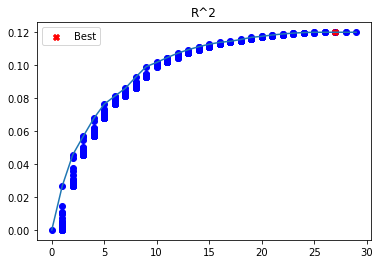

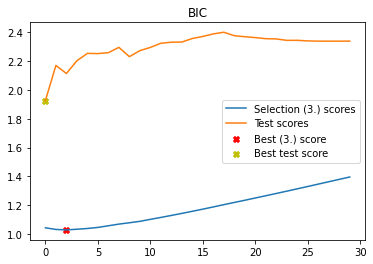

In [33]:
# Applying the forward selection algorithm using the MSE score to choose the best one
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="BIC",
                  verbose=True)

The R2 increases as the number of variables increases, wich is expected, while the BIC show that 
the preferred model is the one containing 2 features being the september and the december month
I will try to predict the area values using the 2 features suggested by the model

In [34]:
X_features = ['month_sep', 'month_dec']
X = forest_data[X_features].to_numpy()
forest_test_seed = 40
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y,
                                                                test_size=forest_test_size, 
                                                                random_state=forest_test_seed)

model = LinearRegression()                       # 1- hyperparams selection
model = model.fit(X_train_small, y_train_small)        # 2- model fitting
y_predict_test = model.predict(X_test_small)     # 3- prediction
y_predict_train = model.predict(X_train_small)


print("Train R2 score ", r2_score(y_train_small, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train_small, y_predict_train))

print("Test R2 score ", r2_score(y_test_small, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test_small, y_predict_test))

Train R2 score  0.04565190379318418
Train MSE score  1.8382467
Test R2 score  -0.03545141545115271
Test MSE score  2.1135528


 r2 is still low, and it does not seem that the model can correctly predict the area value.
    Indeed, if the forest_test_seed is changed, the results vary in a substantial way, this could be the case
    if the dataset is not divided into equal groups, having more or less impact in the prediction

### Cross-Validated Forward Selection

............
Best model (M0) with 0 features: ['month_sep']
M0 subset score (3.): -0.06287197068023653
............
Best model (M1) with 1 features: ['month_sep', 'month_dec']
M1 subset score (3.): -0.03545141545115271
............
Best model (M2) with 2 features: ['month_sep', 'month_dec', 'month_may']
M2 subset score (3.): -0.07871335554457293
............
Best model (M3) with 3 features: ['month_sep', 'month_dec', 'month_may', 'wind']
M3 subset score (3.): -0.10375995624052425
............
Best model (M4) with 4 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X']
M4 subset score (3.): -0.10305567408802618
............
Best model (M5) with 5 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri']
M5 subset score (3.): -0.10614853422138637
............
Best model (M6) with 6 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri', 'month_feb']
M6 subset score (3.): -0.12428528052295595
............
Best model (M7) with 7 features: ['month_

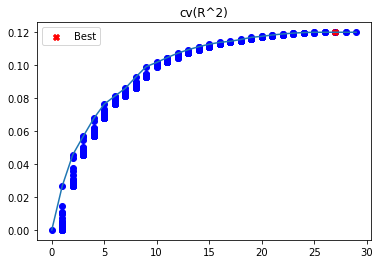

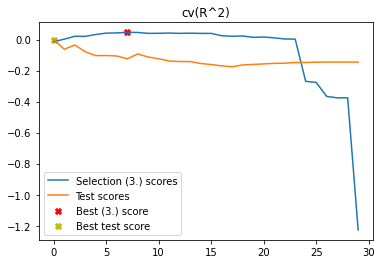

In [35]:
def get_val_evaluator(scorer, val_size=0.3):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=mpg_test_seed)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator


cv = 10
sigma = estimate_sigma(X_train_pd, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  # Use either 5-fold CV or (1-fold cross) validation to 
                  # estimate the test R^2 error at step (3.) of the algorithm
                  get_cv_evaluator(make_scorer(r2_score)), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

With cross validation, the best set with a higher r2 seems to be the one being by 
'month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri', 'month_feb'

In [36]:
X_features = ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri', 'month_feb']
X = forest_data[X_features].to_numpy()
forest_test_seed = 40
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y,
                                                                test_size=forest_test_size, 
                                                                random_state=forest_test_seed)

model = LinearRegression()                       # 1- hyperparams selection
model = model.fit(X_train_small, y_train_small)        # 2- model fitting
y_predict_test = model.predict(X_test_small)     # 3- prediction
y_predict_train = model.predict(X_train_small)


print("Train R2 score ", r2_score(y_train_small, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train_small, y_predict_train))

print("Test R2 score ", r2_score(y_test_small, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test_small, y_predict_test))

Train R2 score  0.08593836560474832
Train MSE score  1.7606478
Test R2 score  -0.12428528052295595
Test MSE score  2.2948797


 The results of the r2 score seem to tell that the model can not correctly
 predict the test set.
 One of the reasons that this could be the case, could be the presence
 of a high number of 0 parameters in the 'area' variable.
 that causes the model to try predict 0, wich explain the low/negative
 values or r2.

 There could be other reasons that would cause a lower r2 score,
 I will try then to modify some of the assumptions made at the start
 to check if the model could explain better the results

 the first one I will try is to delete the variables in month,
 this is because even in the paper there is an argument
 being that the weather values, indirectly explain the month
 by doing so, the computational load could be lower, 
 and a best feature selection may be possible.

In [37]:
X_nom_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']

X = forest_data[X_nom_features].to_numpy()


print("X.shape", X.shape, "X.dtype", X.dtype)
print("y.shape", y.shape, "y.dtype", y.dtype)

X.shape (510, 17) X.dtype float32
y.shape (510,) y.dtype float32


In [38]:
forest_test_size = 0.3
forest_test_seed = 40
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=forest_test_size, random_state=forest_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

X_train.shape  (357, 17)
X_test.shape  (153, 17)


In [39]:
model = LinearRegression(fit_intercept=True) 
model = model.fit(X_train, y_train)

# Prediction
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))
# The model does not seem to be predicting the model well

Train R2 score  0.03483885369916062
Train MSE score  1.8590748
Test R2 score  -0.004950650042177207
Test MSE score  2.051295


In [40]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train, y_train, betas, ['Intercept', *X_nom_features], alpha=0.001)

,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-0.985140,1.048282e+07,-9.397662e-08,1.000000,False
1,X,0.040460,3.774700e-02,1.071870e+00,0.284539,False
2,Y,0.049254,7.261466e-02,6.782934e-01,0.498047,False
3,FFMC,0.016085,1.534456e-02,1.048271e+00,0.295258,False
4,DMC,-0.000775,1.900924e-03,-4.077352e-01,0.683725,False
5,DC,0.000594,4.410263e-04,1.345822e+00,0.179256,False
6,ISI,-0.022082,1.907330e-02,-1.157741e+00,0.247782,False
7,temp,-0.006371,2.174935e-02,-2.929222e-01,0.769760,False
8,RH,-0.001775,6.765302e-03,-2.623694e-01,0.793196,False
9,wind,0.097007,4.347816e-02,2.231163e+00,0.026322,False


In [41]:
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train, y_train, betas, ['Intercept', *X_nom_features], alpha=0.05)

,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-0.985140,1.048282e+07,-9.397662e-08,1.000000,False
1,X,0.040460,3.774700e-02,1.071870e+00,0.284539,False
2,Y,0.049254,7.261466e-02,6.782934e-01,0.498047,False
3,FFMC,0.016085,1.534456e-02,1.048271e+00,0.295258,False
4,DMC,-0.000775,1.900924e-03,-4.077352e-01,0.683725,False
5,DC,0.000594,4.410263e-04,1.345822e+00,0.179256,False
6,ISI,-0.022082,1.907330e-02,-1.157741e+00,0.247782,False
7,temp,-0.006371,2.174935e-02,-2.929222e-01,0.769760,False
8,RH,-0.001775,6.765302e-03,-2.623694e-01,0.793196,False
9,wind,0.097007,4.347816e-02,2.231163e+00,0.026322,True


 Even in this case, wind seems to be the only one significant enough, 
 but a higher alpha is needed, even though, the precedent test of the wind variable did no 
 see good results, and a possible test in this case would give the same results

In [42]:
X_train_pd = pd.DataFrame(X_train, columns=X_nom_features)
X_test_pd = pd.DataFrame(X_test, columns=X_nom_features)

In [43]:
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possibile combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim) # list of list of names [[name of first candidate, ...], [...]]
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

### Best Feature Selection

Due to computational limiations, the best feature selection was not possible with the months coded as 1-of-c.
It is now possible to use the best feature algorithm to select the best set of predictors

............
Best model (M0) with 0 features: []
M0 subset score (3.): 2.0448663234710693
............
Best model (M1) with 1 features: ['wind']
M1 subset score (3.): 2.060657262802124
............
Best model (M2) with 2 features: ['X', 'wind']
M2 subset score (3.): 2.0615429878234863
............
Best model (M3) with 3 features: ['X', 'DC', 'wind']
M3 subset score (3.): 2.0330567359924316
............
Best model (M4) with 4 features: ['X', 'DC', 'wind', 'day_sat']
M4 subset score (3.): 2.026872396469116
............
Best model (M5) with 5 features: ['X', 'DC', 'ISI', 'wind', 'day_sat']
M5 subset score (3.): 2.027860403060913
............
Best model (M6) with 6 features: ['X', 'FFMC', 'DC', 'ISI', 'wind', 'day_sat']
M6 subset score (3.): 2.0236401557922363
............
Best model (M7) with 7 features: ['X', 'FFMC', 'DC', 'ISI', 'wind', 'day_sat', 'day_sun']
M7 subset score (3.): 2.0308773517608643
............
Best model (M8) with 8 features: ['X', 'Y', 'FFMC', 'DC', 'ISI', 'wind', 'da

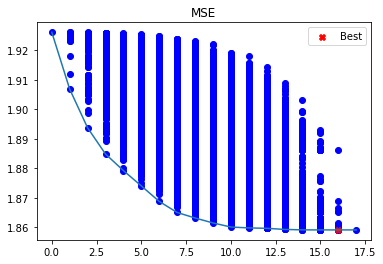

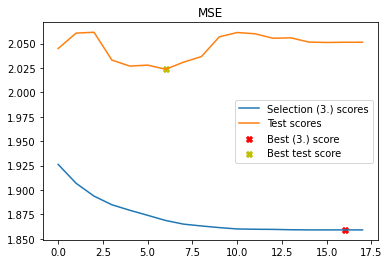

In [44]:
from sklearn.dummy import DummyRegressor

def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     candidates_evaluator, candidates_argbest, 
                     subsets_evaluator, subsets_argbest,       
                     test_evaluator=None, test_argbest=None, 
                     candidates_scorer_name=None,  
                     subsets_scorer_name=None,    
                     verbose=True, weight_step3=0):  
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    

    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    subsets_test = [] 
    subsets_metric = []    
    subsets_best_features = [] 
    plt.figure()
    candidate_fig = plt.subplot(111) 
    num_evaluations = 0        
    

    for dim in range(num_features+1):
        candidate_metrics = []
        candidate_models = []  
        
        dim_subsets = get_subsets(Xtrain_pd, dim=dim)
        for Xtrain_sub in dim_subsets:
            
            if Xtrain_sub.shape[-1] == 0:
                model = DummyRegressor()
            else:
                model = LinearRegression(fit_intercept=True)
            
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([dim]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            

        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Save best candidate features
        best_features = dim_subsets[idx_best_candidate].columns.tolist()
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        subsets_best_features.append(best_features)
        
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = dim_subsets[idx_best_candidate]
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_subset_Xtrain.columns.tolist()]
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="MSE",
                 subsets_scorer_name="MSE",
                 verbose=True)

I then used the best features to build a prediction model

In [45]:
X_best_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_wed']

new_X = forest_data[X_best_features].to_numpy()

print("X.shape", new_X.shape, "X.dtype", new_X.dtype)
print("y.shape", y.shape, "y.dtype", y.dtype)

X.shape (510, 16) X.dtype float32
y.shape (510,) y.dtype float32


In [46]:
forest_test_size = 0.3
forest_test_seed = 40
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=forest_test_size, random_state=forest_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

X_train.shape  (357, 16)
X_test.shape  (153, 16)


In [47]:
model = LinearRegression(fit_intercept=True) 
model = model.fit(X_train, y_train)

# Prediction
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))
# The model does not seem to be predicting the model well

Train R2 score  0.03483887444958811
Train MSE score  1.8590746
Test R2 score  -0.00495067833615459
Test MSE score  2.051295


Even with the best feature selection, it does not seem
 to correctly predict the area data, again,
 this could be to a large amount of 0 that are still signficant
 so it is not possible to delete/modify them

### Cross Validation

............
Best model (M0) with 0 features: ['wind']
M0 subset score (3.): -0.009537339078439233
............
Best model (M1) with 1 features: ['wind', 'X']
M1 subset score (3.): -0.009971224530668676
............
Best model (M2) with 2 features: ['wind', 'X', 'DC']
M2 subset score (3.): 0.003984609039816234
............
Best model (M3) with 3 features: ['wind', 'X', 'DC', 'day_sat']
M3 subset score (3.): 0.007014126628263395
............
Best model (M4) with 4 features: ['wind', 'X', 'DC', 'day_sat', 'ISI']
M4 subset score (3.): 0.006530316472921349
............
Best model (M5) with 5 features: ['wind', 'X', 'DC', 'day_sat', 'ISI', 'FFMC']
M5 subset score (3.): 0.008597694267017952
............
Best model (M6) with 6 features: ['wind', 'X', 'DC', 'day_sat', 'ISI', 'FFMC', 'day_sun']
M6 subset score (3.): 0.005052046485234052
............
Best model (M7) with 7 features: ['wind', 'X', 'DC', 'day_sat', 'ISI', 'FFMC', 'day_sun', 'Y']
M7 subset score (3.): 0.0022431588859151974
........

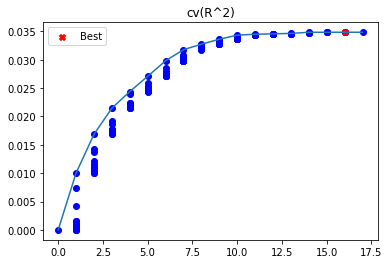

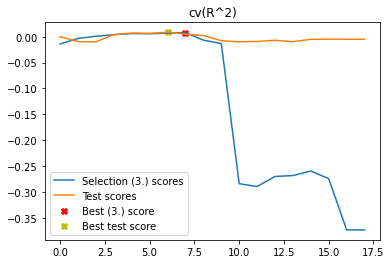

In [48]:
cv = 10
sigma = estimate_sigma(X_train, y_train)
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.b
                  # Use either 5-fold CV or (1-fold cross) validation to 
                  # estimate the test R^2 error at step (3.) of the algorithm
                  get_cv_evaluator(make_scorer(r2_score)), np.argmax, # 3.
                  get_evaluator(make_scorer(r2_score)), np.argmax, # test
                  candidates_scorer_name="cv(R^2)",
                  subsets_scorer_name="cv(R^2)",
                  verbose=True, weight_step3=10)

In [49]:
X_best_features = ['wind', 'X', 'DC', 'day_sat', 'ISI', 'FFMC', 'day_sun']
new_X = forest_data[X_best_features].to_numpy()

print("X.shape", new_X.shape, "X.dtype", new_X.dtype)
print("y.shape", y.shape, "y.dtype", y.dtype)

X.shape (510, 7) X.dtype float32
y.shape (510,) y.dtype float32


In [50]:
forest_test_size = 0.3
forest_test_seed = 40
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=forest_test_size, random_state=forest_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)

X_train.shape  (357, 7)
X_test.shape  (153, 7)


In [51]:
model = LinearRegression(fit_intercept=True) 
model = model.fit(X_train, y_train)

# Prediction
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)


print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))


Train R2 score  0.03176447956118056
Train MSE score  1.8649966
Test R2 score  0.005052046485234052
Test MSE score  2.0308774


And even in this case, forward selection with cross validation does
not give interesting enough results, the best features configuration
 is anyway congruent with the paper, afferming that the main
 cause of fire is human, and in fact the model predicted saturday and 
 sunday as variables that could help justify the results

In [52]:
# I then tried to apply lasso to see if there would be any interesting result

### Lasso

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline

X_all_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']

X_all_features_no_months = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']

#clf = Lasso(alpha=1/20)


new_X = forest_data[X_all_features].to_numpy()
forest_test_size = 0.3
forest_test_seed = 40
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=forest_test_size, random_state=forest_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)


pipeline = Pipeline([('model',Lasso())])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)


search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
coefficients
importance


X_train.shape  (357, 29)
X_test.shape  (153, 29)
Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-2.426 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-1.759 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-1.732 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-1.707 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-2.213 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-2.420 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-1.730 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-1.749 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-1.740 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-2.209 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-2.423 total time=   0.0

[CV 2/5] END .................model__alpha=3.1;, score=-1.697 total time=   0.0s
[CV 3/5] END .................model__alpha=3.1;, score=-1.766 total time=   0.0s
[CV 4/5] END .................model__alpha=3.1;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=3.1;, score=-2.202 total time=   0.0s
[CV 1/5] END .................model__alpha=3.2;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=3.2;, score=-1.696 total time=   0.0s
[CV 3/5] END .................model__alpha=3.2;, score=-1.766 total time=   0.0s
[CV 4/5] END .................model__alpha=3.2;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=3.2;, score=-2.202 total time=   0.0s
[CV 1/5] END ..model__alpha=3.3000000000000003;, score=-2.412 total time=   0.0s
[CV 2/5] END ..model__alpha=3.3000000000000003;, score=-1.696 total time=   0.0s
[CV 3/5] END ..model__alpha=3.3000000000000003;, score=-1.765 total time=   0.0s
[CV 4/5] END ..model__alpha=

[CV 3/5] END .................model__alpha=7.1;, score=-1.764 total time=   0.0s
[CV 4/5] END .................model__alpha=7.1;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=7.1;, score=-2.199 total time=   0.0s
[CV 1/5] END .................model__alpha=7.2;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=7.2;, score=-1.689 total time=   0.0s
[CV 3/5] END .................model__alpha=7.2;, score=-1.764 total time=   0.0s
[CV 4/5] END .................model__alpha=7.2;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=7.2;, score=-2.199 total time=   0.0s
[CV 1/5] END .................model__alpha=7.3;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=7.3;, score=-1.689 total time=   0.0s
[CV 3/5] END .................model__alpha=7.3;, score=-1.764 total time=   0.0s
[CV 4/5] END .................model__alpha=7.3;, score=-1.649 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

{'model__alpha': 9.9}

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        5.551862e-05, -0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
       -0.000000e+00, -0.000000e+00,  0.000000e+00, -0.000000e+00,
       -0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
       -0.000000e+00], dtype=float32)

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       5.551862e-05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00], dtype=float32)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Lasso(alpha=10000.0)

Lasso(alpha=0.9899029895070284)

Lasso(alpha=0.4949759936643072)

Lasso(alpha=0.32998944033790917)

Lasso(alpha=0.24749412201460216)

Lasso(alpha=0.19799627766997982)

Lasso(alpha=0.16499744253964063)

Lasso(alpha=0.14142671267749052)

Lasso(alpha=0.1237485923597619)

Lasso(alpha=0.10999890001099989)

Lasso(alpha=0.09899911890784173)

Lasso(alpha=0.08999928000575995)

Lasso(alpha=0.08249940187933638)

Lasso(alpha=0.07615334237019664)

Lasso(alpha=0.07071385638015769)

Lasso(alpha=0.06599963040206974)

Lasso(alpha=0.06187467902510256)

Lasso(alpha=0.058235013219348)

Lasso(alpha=0.05499975250111375)

Lasso(alpha=0.05210504376823676)

Lasso(alpha=0.049499804475772326)

Lasso(alpha=0.0471426820414667)

Lasso(alpha=0.044999842500551245)

Lasso(alpha=0.04304333603071573)

Lasso(alpha=0.04124987109415283)

Lasso(alpha=0.03959988278434696)

Lasso(alpha=0.038076816168939216)

Lasso(alpha=0.036666568889149626)

Lasso(alpha=0.03535705320175795)

Lasso(alpha=0.03413784863277916)

Lasso(alpha=0.03299992410017457)

Lasso(alpha=0.03193541381909227)

Lasso(alpha=0.030937435224744996)

Lasso(alpha=0.029999940000119997)

Lasso(alpha=0.02911759139283998)

Lasso(alpha=0.028285662563359883)

Lasso(alpha=0.02749995187508422)

Lasso(alpha=0.02675671192118543)

Lasso(alpha=0.02605258975768486)

Lasso(alpha=0.025384576331421025)

Lasso(alpha=0.02474996349380385)

Lasso(alpha=0.02414630730522381)

Lasso(alpha=0.023571396581676066)

Lasso(alpha=0.02302322583021752)

Lasso(alpha=0.022499971875035153)

Lasso(alpha=0.021999973600031676)

Lasso(alpha=0.021521714333676962)

Lasso(alpha=0.02106380648259708)

Lasso(alpha=0.020624978085960782)

Lasso(alpha=0.020204061016264267)

Lasso(alpha=0.019799980596019014)

Lasso(alpha=0.019411746436003356)

Lasso(alpha=0.019038444330636853)

Lasso(alpha=0.018679229070857787)

Lasso(alpha=0.018333318055568287)

Lasso(alpha=0.01799998560001152)

Lasso(alpha=0.017678557853964504)

Lasso(alpha=0.017368408254857075)

Lasso(alpha=0.017068953451257043)

Lasso(alpha=0.016779649640915495)

Lasso(alpha=0.016499989275006968)

Lasso(alpha=0.016229498086542175)

Lasso(alpha=0.01596773240635324)

Lasso(alpha=0.01571427673469901)

Lasso(alpha=0.01546874154053197)

Lasso(alpha=0.015230761263909494)

Lasso(alpha=0.014999992500003749)

Lasso(alpha=0.014776112345737388)

Lasso(alpha=0.014558816892304063)

Lasso(alpha=0.014347819848773978)

Lasso(alpha=0.014142851283675897)

Lasso(alpha=0.013943656472924207)

Lasso(alpha=0.013749994843751934)

Lasso(alpha=0.01356163900544364)

Lasso(alpha=0.01337837385865748)

Lasso(alpha=0.013199995776001353)

Lasso(alpha=0.01302631184730036)

Lasso(alpha=0.012857139183674518)

Lasso(alpha=0.012692304275148848)

Lasso(alpha=0.012531642397052557)

Lasso(alpha=0.0123749970609382)

Lasso(alpha=0.012222219506173443)

Lasso(alpha=0.012073168228733416)

Lasso(alpha=0.011927708544056182)

Lasso(alpha=0.011785712181122825)

Lasso(alpha=0.011647056905190627)

Lasso(alpha=0.011511626166847207)

Lasso(alpha=0.011379308775267756)

Lasso(alpha=0.011249998593750175)

Lasso(alpha=0.011123594255775927)

Lasso(alpha=0.01099999890000011)

Lasso(alpha=0.010879119922714732)

Lasso(alpha=0.010760868746455638)

Lasso(alpha=0.010645160603538024)

Lasso(alpha=0.010531914333408813)

Lasso(alpha=0.010421052192797802)

Lasso(alpha=0.010312499677734385)

Lasso(alpha=0.010206185356573498)

Lasso(alpha=0.010102040713244482)

Lasso(alpha=0.01)

Text(0.5, 0, 'C=1/lambda')

Text(0, 0.5, 'beta')

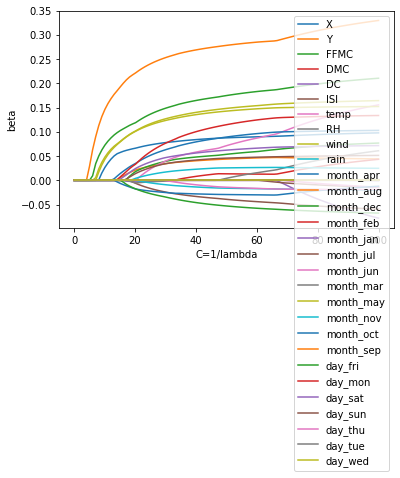

In [54]:
C_vals = np.linspace(1e-4, 100, 100)
betas = []

from sklearn import preprocessing
X_std = preprocessing.scale(X_train)

#c is inverse of a parameter lambda 

for C in C_vals:
    clf = Lasso(alpha=1/C)
    clf.fit(X_std, y_train)
    beta = clf.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

for beta, name in zip(betas, X_all_features):
    plt.plot(C_vals, beta, label=name)
plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta")

Lasso shows month of september as the variable with the most significance, and month of december the second one.
both of those variables have been tested and could not give good enough results.

I will try now lasso without months.

In [55]:
new_X = forest_data[X_all_features_no_months].to_numpy()
forest_test_size = 0.3
forest_test_seed = 40
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=forest_test_size, random_state=forest_test_seed)
print("X_train.shape ", X_train.shape)
print("X_test.shape ", X_test.shape)
pipeline = Pipeline([('model',Lasso())])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train)


search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
coefficients
importance

X_train.shape  (357, 17)
X_test.shape  (153, 17)
Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-2.426 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-1.761 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-1.733 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-1.707 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-2.213 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-2.420 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-1.730 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-1.749 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-1.740 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-2.209 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-2.423 total time=   0.0

[CV 5/5] END .................model__alpha=4.8;, score=-2.200 total time=   0.0s
[CV 1/5] END .................model__alpha=4.9;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=4.9;, score=-1.693 total time=   0.0s
[CV 3/5] END .................model__alpha=4.9;, score=-1.765 total time=   0.0s
[CV 4/5] END .................model__alpha=4.9;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=4.9;, score=-2.200 total time=   0.0s
[CV 1/5] END .................model__alpha=5.0;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=5.0;, score=-1.693 total time=   0.0s
[CV 3/5] END .................model__alpha=5.0;, score=-1.765 total time=   0.0s
[CV 4/5] END .................model__alpha=5.0;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=5.0;, score=-2.200 total time=   0.0s
[CV 1/5] END .................model__alpha=5.1;, score=-2.412 total time=   0.0s
[CV 2/5] END ...............

[CV 5/5] END .................model__alpha=9.4;, score=-2.198 total time=   0.0s
[CV 1/5] END .................model__alpha=9.5;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=9.5;, score=-1.685 total time=   0.0s
[CV 3/5] END .................model__alpha=9.5;, score=-1.763 total time=   0.0s
[CV 4/5] END .................model__alpha=9.5;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=9.5;, score=-2.198 total time=   0.0s
[CV 1/5] END .................model__alpha=9.6;, score=-2.412 total time=   0.0s
[CV 2/5] END .................model__alpha=9.6;, score=-1.685 total time=   0.0s
[CV 3/5] END .................model__alpha=9.6;, score=-1.763 total time=   0.0s
[CV 4/5] END .................model__alpha=9.6;, score=-1.649 total time=   0.0s
[CV 5/5] END .................model__alpha=9.6;, score=-2.198 total time=   0.0s
[CV 1/5] END ...model__alpha=9.700000000000001;, score=-2.412 total time=   0.0s
[CV 2/5] END ...model__alpha

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

{'model__alpha': 9.9}

array([ 0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        5.551862e-05, -0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
       -0.000000e+00], dtype=float32)

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       5.551862e-05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00], dtype=float32)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Lasso(alpha=10000.0)

Lasso(alpha=0.9899029895070284)

Lasso(alpha=0.4949759936643072)

Lasso(alpha=0.32998944033790917)

Lasso(alpha=0.24749412201460216)

Lasso(alpha=0.19799627766997982)

Lasso(alpha=0.16499744253964063)

Lasso(alpha=0.14142671267749052)

Lasso(alpha=0.1237485923597619)

Lasso(alpha=0.10999890001099989)

Lasso(alpha=0.09899911890784173)

Lasso(alpha=0.08999928000575995)

Lasso(alpha=0.08249940187933638)

Lasso(alpha=0.07615334237019664)

Lasso(alpha=0.07071385638015769)

Lasso(alpha=0.06599963040206974)

Lasso(alpha=0.06187467902510256)

Lasso(alpha=0.058235013219348)

Lasso(alpha=0.05499975250111375)

Lasso(alpha=0.05210504376823676)

Lasso(alpha=0.049499804475772326)

Lasso(alpha=0.0471426820414667)

Lasso(alpha=0.044999842500551245)

Lasso(alpha=0.04304333603071573)

Lasso(alpha=0.04124987109415283)

Lasso(alpha=0.03959988278434696)

Lasso(alpha=0.038076816168939216)

Lasso(alpha=0.036666568889149626)

Lasso(alpha=0.03535705320175795)

Lasso(alpha=0.03413784863277916)

Lasso(alpha=0.03299992410017457)

Lasso(alpha=0.03193541381909227)

Lasso(alpha=0.030937435224744996)

Lasso(alpha=0.029999940000119997)

Lasso(alpha=0.02911759139283998)

Lasso(alpha=0.028285662563359883)

Lasso(alpha=0.02749995187508422)

Lasso(alpha=0.02675671192118543)

Lasso(alpha=0.02605258975768486)

Lasso(alpha=0.025384576331421025)

Lasso(alpha=0.02474996349380385)

Lasso(alpha=0.02414630730522381)

Lasso(alpha=0.023571396581676066)

Lasso(alpha=0.02302322583021752)

Lasso(alpha=0.022499971875035153)

Lasso(alpha=0.021999973600031676)

Lasso(alpha=0.021521714333676962)

Lasso(alpha=0.02106380648259708)

Lasso(alpha=0.020624978085960782)

Lasso(alpha=0.020204061016264267)

Lasso(alpha=0.019799980596019014)

Lasso(alpha=0.019411746436003356)

Lasso(alpha=0.019038444330636853)

Lasso(alpha=0.018679229070857787)

Lasso(alpha=0.018333318055568287)

Lasso(alpha=0.01799998560001152)

Lasso(alpha=0.017678557853964504)

Lasso(alpha=0.017368408254857075)

Lasso(alpha=0.017068953451257043)

Lasso(alpha=0.016779649640915495)

Lasso(alpha=0.016499989275006968)

Lasso(alpha=0.016229498086542175)

Lasso(alpha=0.01596773240635324)

Lasso(alpha=0.01571427673469901)

Lasso(alpha=0.01546874154053197)

Lasso(alpha=0.015230761263909494)

Lasso(alpha=0.014999992500003749)

Lasso(alpha=0.014776112345737388)

Lasso(alpha=0.014558816892304063)

Lasso(alpha=0.014347819848773978)

Lasso(alpha=0.014142851283675897)

Lasso(alpha=0.013943656472924207)

Lasso(alpha=0.013749994843751934)

Lasso(alpha=0.01356163900544364)

Lasso(alpha=0.01337837385865748)

Lasso(alpha=0.013199995776001353)

Lasso(alpha=0.01302631184730036)

Lasso(alpha=0.012857139183674518)

Lasso(alpha=0.012692304275148848)

Lasso(alpha=0.012531642397052557)

Lasso(alpha=0.0123749970609382)

Lasso(alpha=0.012222219506173443)

Lasso(alpha=0.012073168228733416)

Lasso(alpha=0.011927708544056182)

Lasso(alpha=0.011785712181122825)

Lasso(alpha=0.011647056905190627)

Lasso(alpha=0.011511626166847207)

Lasso(alpha=0.011379308775267756)

Lasso(alpha=0.011249998593750175)

Lasso(alpha=0.011123594255775927)

Lasso(alpha=0.01099999890000011)

Lasso(alpha=0.010879119922714732)

Lasso(alpha=0.010760868746455638)

Lasso(alpha=0.010645160603538024)

Lasso(alpha=0.010531914333408813)

Lasso(alpha=0.010421052192797802)

Lasso(alpha=0.010312499677734385)

Lasso(alpha=0.010206185356573498)

Lasso(alpha=0.010102040713244482)

Lasso(alpha=0.01)

Text(0.5, 0, 'C=1/lambda')

Text(0, 0.5, 'beta')

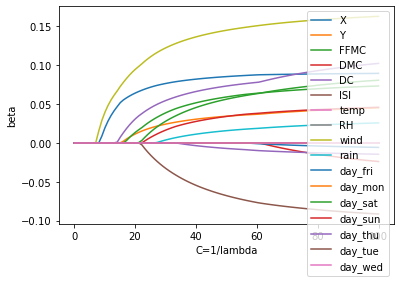

In [56]:
C_vals = np.linspace(1e-4, 100, 100)
betas = []

from sklearn import preprocessing
X_std = preprocessing.scale(X_train)

#c is inverse of a parameter lambda 

for C in C_vals:
    clf = Lasso(alpha=1/C)
    clf.fit(X_std, y_train)
    beta = clf.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

for beta, name in zip(betas, X_all_features_no_months):
    plt.plot(C_vals, beta, label=name)
plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta")

Lasso gives wind as the most important variable, showing X as the second most significative variable.
Both of them seem to show results not good enough to be considered good predictors in the tested set.

It does seems like most of the methods used do not give exhaustive results.
The main reason, as stated before, could be the high number of zeros in the area.
The presence of a zero consists of the presence of a small fire, actually considered only the presence of smoke.
Without some way to remove the zero it would not be possible to actually predict using the predictors cited in this project. 
I did not try to remove the zeros as they are de facto real values, and can not be classified as outliers or as errors, thus I think it is not correct to remove some of them, to better fit the model.

Others type of analysis could be made, like for example classification analysis, to maybe better describe the dataset.
It is indeed interesting to see the most significative variables being the months of September and December, since as the paper suggested, the main cause of fire is human, and while the month of September could make sense, the month of December seems out of place, even considering the average weather conditions.
It would be also interesting to encode the months and the dates into a single variable, but that would be possible only with the year, and also the actual number of the different days. In that case, it would be possible to use best feature selection, since the computational power needed would not be high, but the year and the number associated with the days of the week is not present. 

Alessandro Diamanti